In [44]:
import pandas as pd
import numpy as np
import json
import os

# FOLDER = "../../experiment_results/bagdas_attack_evalcheck/e71_regr_mr_bgwall"
# EXP_NAME = "e71_regr_mr_bgwall"
FOLDER = "../../experiment_results/bagdas_attack_evalcheck/e71_regr_mr_greencar"
EXP_NAME = "e71_regr_mr_greencar"
print("Setup done")

Setup done


In [45]:
tfdata = pd.read_csv(f'{FOLDER}/aggregates/output.csv')
print("Hiya")

Hiya


In [46]:
attacks_evals = {}
for dname in os.listdir(FOLDER):
    if dname != EXP_NAME and dname != "aggregates" and os.path.isdir(f"{FOLDER}/{dname}"):
        # dname is attack-*
        with open(f"{FOLDER}/{dname}/config.json") as file:
            config = json.load(file)
            eval_samples_set = set(config["attack"]["backdoor"]["test"])
            attacks_evals[dname] = eval_samples_set
            

Add up all values

In [47]:
attacks_success = {}
# add up
for key in attacks_evals.keys():
    total = tfdata[f"{key}_evaluation/adv_success"].sum()
    attacks_success[key] = total

print(attacks_success)

{'attack-8': 3.8447916437871754, 'attack-1': 2.657812476158142, 'attack-6': 2.089062498533167, 'attack-7': 4.915104199782945, 'attack-0': 2.5229166448116302, 'attack-9': 3.210416642948985, 'attack-78': 2.9499999787658453, 'attack-47': 4.34895830845926, 'attack-40': 3.913541717105545, 'attack-49': 6.125000032479875, 'attack-76': 3.093229176476598, 'attack-71': 2.4619791705626994, 'attack-25': 1.4333333587273955, 'attack-22': 2.2864583022892475, 'attack-14': 3.0390624701976776, 'attack-13': 2.8494791239500046, 'attack-70': 3.728124989196658, 'attack-48': 3.2494791701901704, 'attack-77': 3.9666665956610814, 'attack-41': 1.3723958171904087, 'attack-79': 2.373958320938982, 'attack-46': 2.325520827085711, 'attack-12': 2.9760416329372674, 'attack-15': 6.175520816934295, 'attack-23': 0.9401041680248454, 'attack-24': 3.60572922823485, 'attack-39': 5.449479144415818, 'attack-37': 4.574479194357991, 'attack-30': 3.3604166746372357, 'attack-64': 8.699479191796854, 'attack-63': 8.495312495622784, '

Combine with eval samples

In [48]:
evals_success = {}
for key, evals in attacks_evals.items():
    for eval in evals:
        if eval not in evals_success:
            evals_success[eval] = attacks_success[key]
        else:
            evals_success[eval] += attacks_success[key]

s = sorted(evals_success.items(), key=lambda item: item[1])
print(s)

[(38658, 12.589583369903266), (49163, 14.052083266433328), (38735, 15.700000089709647), (19165, 20.298958369297907), (49588, 22.17864599172026), (9744, 23.081249848240986), (39824, 24.228645811439492), (4528, 25.39114591537509), (48030, 25.5666667468613), (47001, 27.173958320869133), (19500, 28.405208217096515), (37365, 28.477083283127286), (3378, 29.69270828925073), (41336, 30.315624754759483), (561, 32.22656236065086), (48003, 33.55156239727512), (1605, 33.660416575032286), (41861, 35.181770876049995), (22984, 35.91510409198236), (34385, 36.06562501459848), (34287, 36.25677080254536), (389, 37.795833312906325), (874, 39.0796874583466), (32941, 40.81093765317928), (21422, 42.38281248672865), (3678, 44.24270837265067), (47026, 46.16249981895089), (37533, 47.78750012489036), (40138, 61.14166678825859), (36005, 80.66666637733579)]


Load CIFAR

In [49]:
import tensorflow as tf

# Load the CIFAR10 data.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

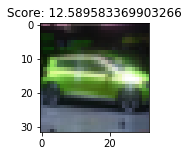

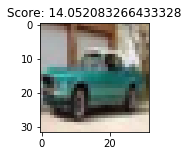

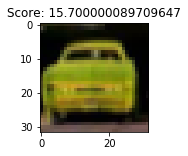

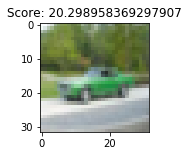

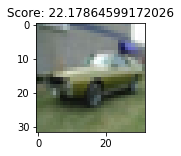

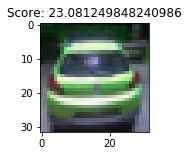

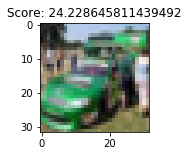

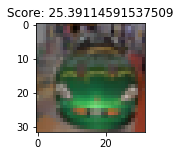

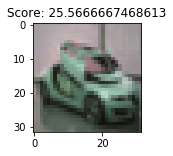

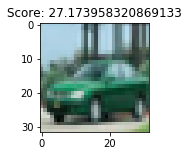

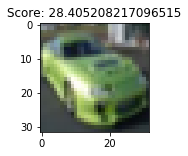

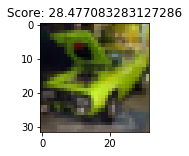

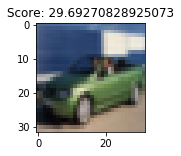

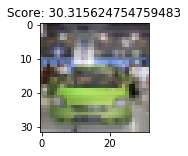

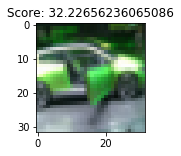

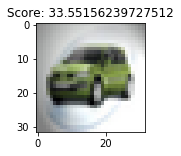

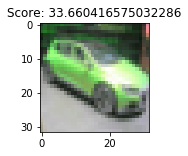

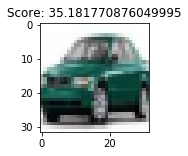

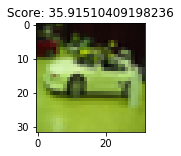

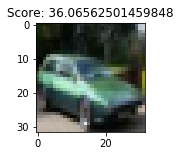

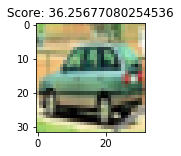

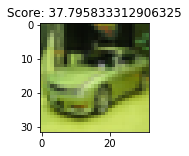

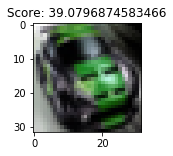

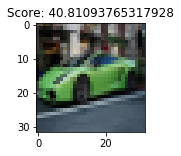

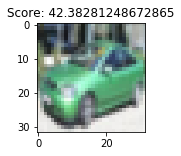

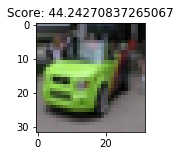

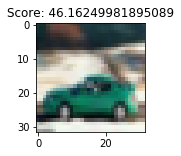

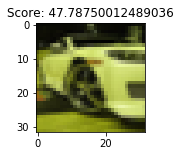

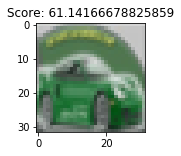

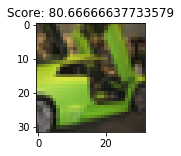

In [50]:
import matplotlib.pyplot as plt

for key, score in s:
    plt.figure(figsize=(2,2))
    plt.imshow(x_train[key])
    plt.title(f"Score: {score}")
    plt.show()